# WeatherPy

# By David Girma

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [12]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [15]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 595


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [21]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | papatowai
Processing Record 2 of Set 1 | nova sintra
Processing Record 3 of Set 1 | margaret river
Processing Record 4 of Set 1 | barranquilla
Processing Record 5 of Set 1 | adamstown
Processing Record 6 of Set 1 | manaure
Processing Record 7 of Set 1 | kailua-kona
Processing Record 8 of Set 1 | hard bargain
Processing Record 9 of Set 1 | grytviken
Processing Record 10 of Set 1 | invercargill
Processing Record 11 of Set 1 | bredasdorp
Processing Record 12 of Set 1 | kodiak
Processing Record 13 of Set 1 | yellowknife
Processing Record 14 of Set 1 | mitu
Processing Record 15 of Set 1 | edinburgh of the seven seas
Processing Record 16 of Set 1 | dunedin
Processing Record 17 of Set 1 | amga
Processing Record 18 of Set 1 | ribeira grande
Processing Record 19 of Set 1 | karratha
Processing Record 20 of Set 1 | port-aux-francais
Processing Record 21 of Set 1 | chardara
Processing Record 22 of Set 1 | ol

In [38]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame.from_dict(city_data)

# Show Record Count
city_data_df.count()

City          573
Lat           573
Lng           573
Max Temp      573
Humidity      573
Cloudiness    573
Wind Speed    573
Country       573
Date          573
dtype: int64

In [40]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,papatowai,-46.5619,169.4708,6.34,93,37,2.61,NZ,1721314759
1,nova sintra,14.8667,-24.7167,24.42,74,14,4.30,CV,1721314760
2,margaret river,-33.9500,115.0667,10.93,62,99,14.03,AU,1721314761
3,barranquilla,10.9639,-74.7964,27.88,83,20,2.06,CO,1721314544
4,adamstown,-25.0660,-130.1015,22.18,86,6,9.10,PN,1721314763


In [42]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [44]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,papatowai,-46.5619,169.4708,6.34,93,37,2.61,NZ,1721314759
1,nova sintra,14.8667,-24.7167,24.42,74,14,4.30,CV,1721314760
2,margaret river,-33.9500,115.0667,10.93,62,99,14.03,AU,1721314761
3,barranquilla,10.9639,-74.7964,27.88,83,20,2.06,CO,1721314544
4,adamstown,-25.0660,-130.1015,22.18,86,6,9.10,PN,1721314763


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

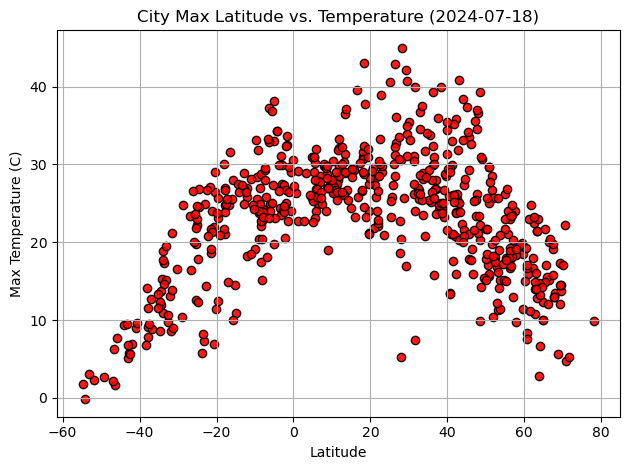

In [65]:
## Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], alpha=0.9, edgecolors="black", color="red")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title(f"City Max Latitude vs. Temperature (2024-07-18)")
plt.grid()
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

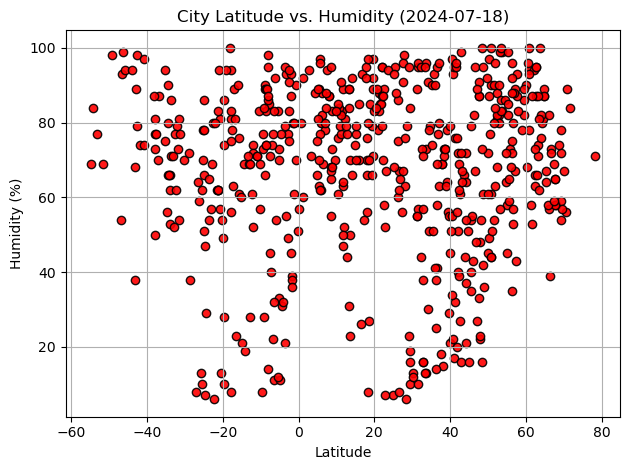

In [73]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], alpha=0.9, edgecolors="black", color="red")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity (2024-07-18)")
plt.grid()
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

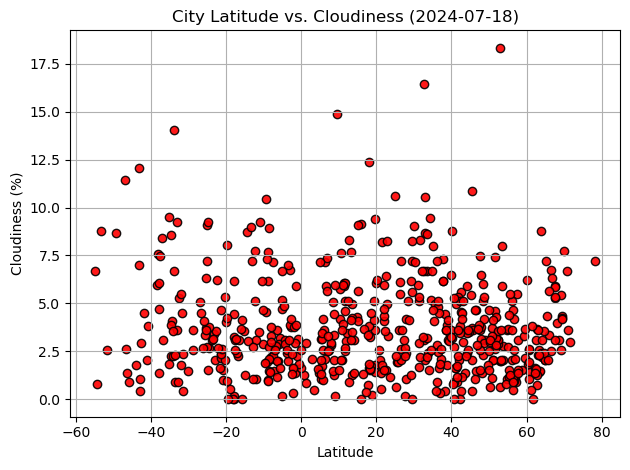

In [75]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], alpha=0.9, edgecolors="black", color="red")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness (2024-07-18)")
plt.grid()
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

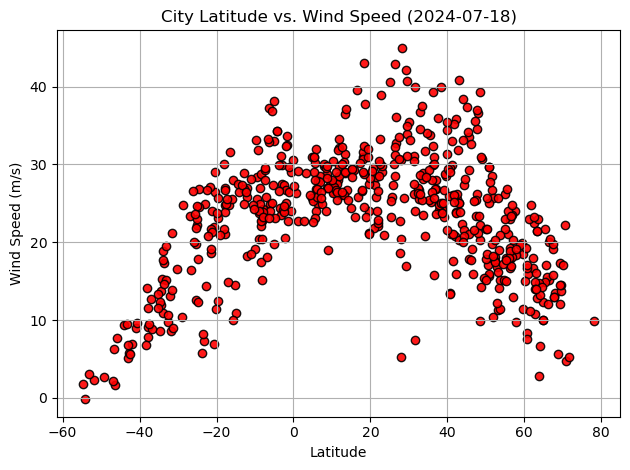

In [79]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], alpha=0.9, edgecolors="black", color="red")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"City Latitude vs. Wind Speed (2024-07-18)")
plt.grid()
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [93]:
# Define a function to create Linear Regression plots
# FROM PREVIOUS CHALLENGE:

# slope, int, r, p, std_err = stats.linregress(avg_capomulin_vol["Weight (g)"],avg_capomulin_vol["Tumor Volume (mm3)"])
# fit = slope * df_1 + int
# plt.scatter(df_1, df_2)
# plt.plot(df_1, fit)

In [95]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemisphere_df = city_data_df.loc[city_data_df["Lat"] >= 0, :]

# Display sample data
northern_hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,nova sintra,14.8667,-24.7167,24.42,74,14,4.30,CV,1721314760
3,barranquilla,10.9639,-74.7964,27.88,83,20,2.06,CO,1721314544
5,manaure,11.7751,-72.4445,29.82,63,100,2.53,CO,1721314764
6,kailua-kona,19.6406,-155.9956,23.98,92,100,3.60,US,1721314765
7,hard bargain,26.3167,-77.5667,28.56,75,97,5.51,BS,1721314767


In [98]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemisphere_df = city_data_df.loc[city_data_df["Lat"] < 0, :]

# Display sample data
southern_hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,papatowai,-46.5619,169.4708,6.34,93,37,2.61,NZ,1721314759
2,margaret river,-33.9500,115.0667,10.93,62,99,14.03,AU,1721314761
4,adamstown,-25.0660,-130.1015,22.18,86,6,9.10,PN,1721314763
8,grytviken,-54.2811,-36.5092,-0.16,84,39,0.79,GS,1721314768
9,invercargill,-46.4000,168.3500,1.68,99,23,1.34,NZ,1721314769


###  Temperature vs. Latitude Linear Regression Plot

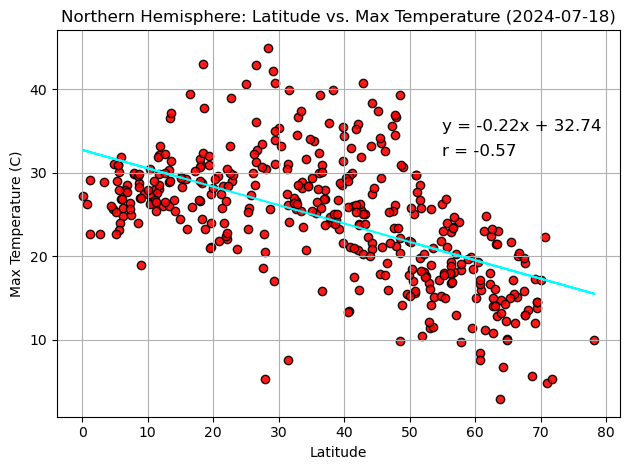

In [168]:
# Linear regression on Northern Hemisphere
import scipy.stats as stats
slope, int, r, p, std_err = stats.linregress(northern_hemisphere_df["Lat"], northern_hemisphere_df["Max Temp"])
fit = slope * northern_hemisphere_df["Lat"] + int
plt.scatter(northern_hemisphere_df["Lat"], northern_hemisphere_df["Max Temp"], alpha=0.9, edgecolors="black", color="red")
plt.plot(northern_hemisphere_df["Lat"], fit, color="cyan")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title(f"Northern Hemisphere: Latitude vs. Max Temperature (2024-07-18)")
plt.grid()
plt.tight_layout()
eq = "y = " + str(round(slope,2)) + "x + " + str(round(int,2))
plt.annotate(eq,(55,35), fontsize=12)
reg = "r = " + str(round(r,2))
plt.annotate(reg,(55,32), fontsize=12)

# Save the figure
plt.savefig("output_data/Fig5.png")

# Show plot
plt.show()

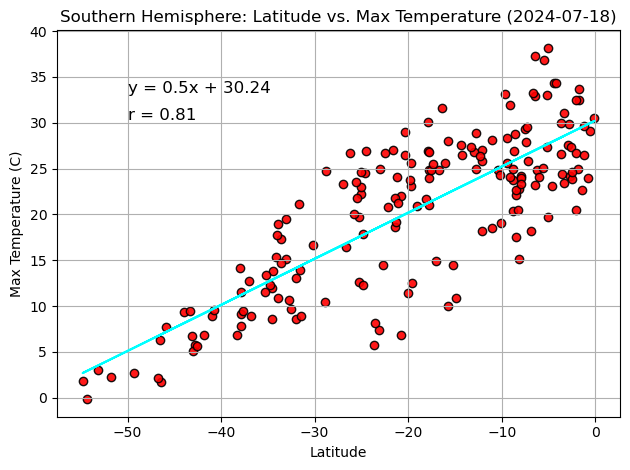

In [170]:
# Linear regression on Southern Hemisphere
slope, int, r, p, std_err = stats.linregress(southern_hemisphere_df["Lat"], southern_hemisphere_df["Max Temp"])
fit = slope * southern_hemisphere_df["Lat"] + int
plt.scatter(southern_hemisphere_df["Lat"], southern_hemisphere_df["Max Temp"], alpha=0.9, edgecolors="black", color="red")
plt.plot(southern_hemisphere_df["Lat"], fit, color="cyan")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title(f"Southern Hemisphere: Latitude vs. Max Temperature (2024-07-18)")
plt.grid()
plt.tight_layout()
eq = "y = " + str(round(slope,2)) + "x + " + str(round(int,2))
plt.annotate(eq,(-50,33.3), fontsize=12)
reg = "r = " + str(round(r,2))
plt.annotate(reg,(-50,30.3), fontsize=12)

# Save the figure
plt.savefig("output_data/Fig6.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** or the Northern Hemisphere I would say there is not a strong correlation, however for the Southern Hemisphere there is definetly a postivy correlation, the closer to the South Pole the colder it gets.

### Humidity vs. Latitude Linear Regression Plot

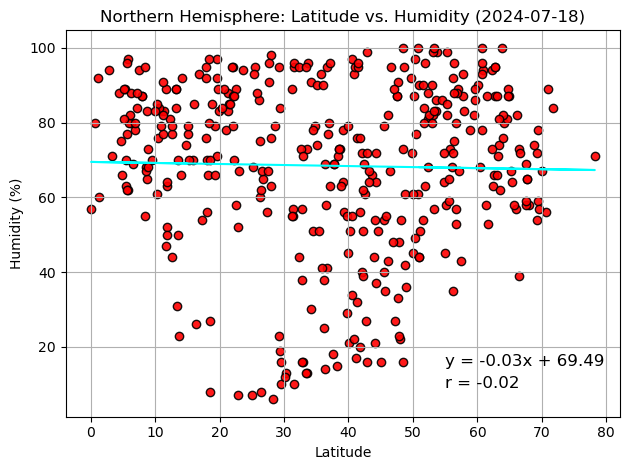

In [186]:
# Northern Hemisphere
slope, int, r, p, std_err = stats.linregress(northern_hemisphere_df["Lat"], northern_hemisphere_df["Humidity"])
fit = slope * northern_hemisphere_df["Lat"] + int
plt.scatter(northern_hemisphere_df["Lat"], northern_hemisphere_df["Humidity"], alpha=0.9, edgecolors="black", color="red")
plt.plot(northern_hemisphere_df["Lat"], fit, color="cyan")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"Northern Hemisphere: Latitude vs. Humidity (2024-07-18)")
plt.grid()
plt.tight_layout()
eq = "y = " + str(round(slope,2)) + "x + " + str(round(int,2))
plt.annotate(eq,(55,15), fontsize=12)
reg = "r = " + str(round(r,2))
plt.annotate(reg,(55,9), fontsize=12)

# Save the figure
plt.savefig("output_data/Fig7.png")

# Show plot
plt.show()

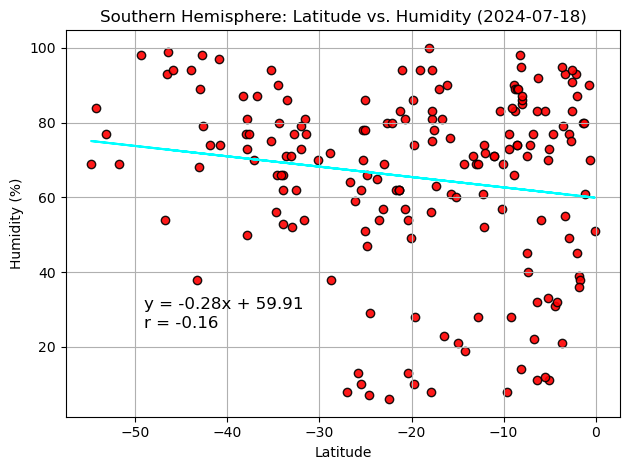

In [195]:
# Southern Hemisphere
slope, int, r, p, std_err = stats.linregress(southern_hemisphere_df["Lat"], southern_hemisphere_df["Humidity"])
fit = slope * southern_hemisphere_df["Lat"] + int
plt.scatter(southern_hemisphere_df["Lat"], southern_hemisphere_df["Humidity"], alpha=0.9, edgecolors="black", color="red")
plt.plot(southern_hemisphere_df["Lat"], fit, color="cyan")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"Southern Hemisphere: Latitude vs. Humidity (2024-07-18)")
plt.grid()
plt.tight_layout()
eq = "y = " + str(round(slope,2)) + "x + " + str(round(int,2))
plt.annotate(eq,(-49,30), fontsize=12)
reg = "r = " + str(round(r,2))
plt.annotate(reg,(-49,25), fontsize=12)

# Save the figure
plt.savefig("output_data/Fig8.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** I see no correlation for the humidity values. 

### Cloudiness vs. Latitude Linear Regression Plot

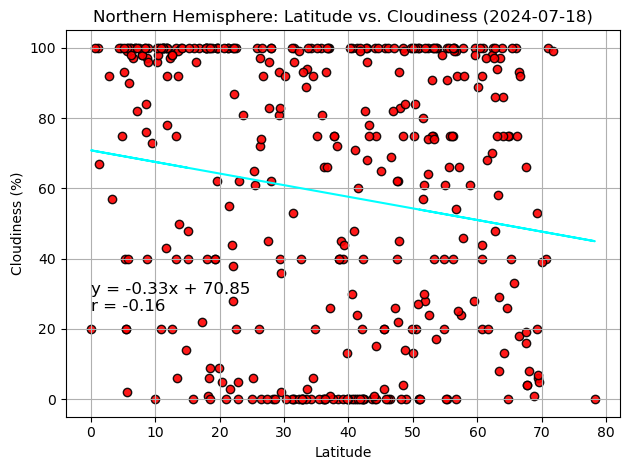

In [204]:
# Northern Hemisphere
slope, int, r, p, std_err = stats.linregress(northern_hemisphere_df["Lat"], northern_hemisphere_df["Cloudiness"])
fit = slope * northern_hemisphere_df["Lat"] + int
plt.scatter(northern_hemisphere_df["Lat"], northern_hemisphere_df["Cloudiness"], alpha=0.9, edgecolors="black", color="red")
plt.plot(northern_hemisphere_df["Lat"], fit, color="cyan")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"Northern Hemisphere: Latitude vs. Cloudiness (2024-07-18)")
plt.grid()
plt.tight_layout()
eq = "y = " + str(round(slope,2)) + "x + " + str(round(int,2))
plt.annotate(eq,(0,30), fontsize=12)
reg = "r = " + str(round(r,2))
plt.annotate(reg,(0,25), fontsize=12)

# Save the figure
plt.savefig("output_data/Fig9.png")

# Show plot
plt.show()

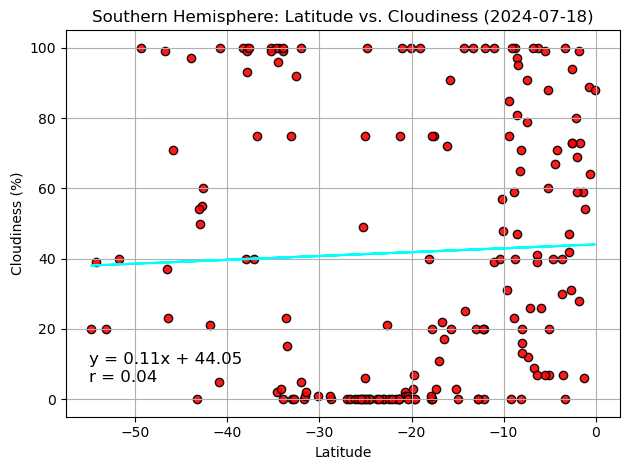

In [214]:
# Southern Hemisphere
slope, int, r, p, std_err = stats.linregress(southern_hemisphere_df["Lat"], southern_hemisphere_df["Cloudiness"])
fit = slope * southern_hemisphere_df["Lat"] + int
plt.scatter(southern_hemisphere_df["Lat"], southern_hemisphere_df["Cloudiness"], alpha=0.9, edgecolors="black", color="red")
plt.plot(southern_hemisphere_df["Lat"], fit, color="cyan")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"Southern Hemisphere: Latitude vs. Cloudiness (2024-07-18)")
plt.grid()
plt.tight_layout()
eq = "y = " + str(round(slope,2)) + "x + " + str(round(int,2))
plt.annotate(eq,(-55,10), fontsize=12)
reg = "r = " + str(round(r,2))
plt.annotate(reg,(-55,5), fontsize=12)

# Save the figure
plt.savefig("output_data/Fig10.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** I see no correlation for the cloudiness values.

### Wind Speed vs. Latitude Linear Regression Plot

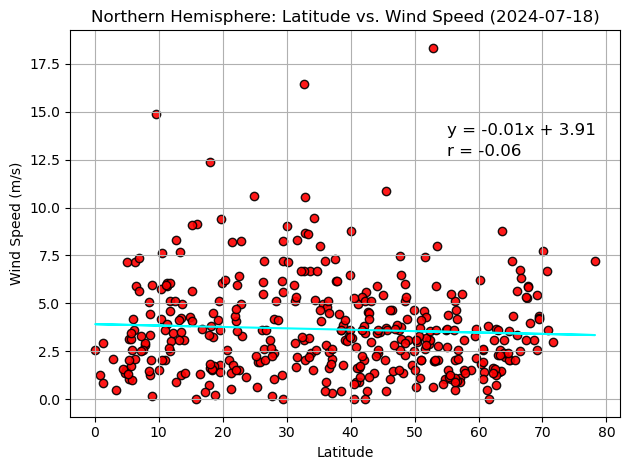

In [229]:
# Northern Hemisphere
slope, int, r, p, std_err = stats.linregress(northern_hemisphere_df["Lat"], northern_hemisphere_df["Wind Speed"])
fit = slope * northern_hemisphere_df["Lat"] + int
plt.scatter(northern_hemisphere_df["Lat"], northern_hemisphere_df["Wind Speed"], alpha=0.9, edgecolors="black", color="red")
plt.plot(northern_hemisphere_df["Lat"], fit, color="cyan")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"Northern Hemisphere: Latitude vs. Wind Speed (2024-07-18)")
plt.grid()
plt.tight_layout()
eq = "y = " + str(round(slope,2)) + "x + " + str(round(int,2))
plt.annotate(eq,(55,13.8), fontsize=12)
reg = "r = " + str(round(r,2))
plt.annotate(reg,(55,12.7), fontsize=12)

# Save the figure
plt.savefig("output_data/Fig11.png")

# Show plot
plt.show()

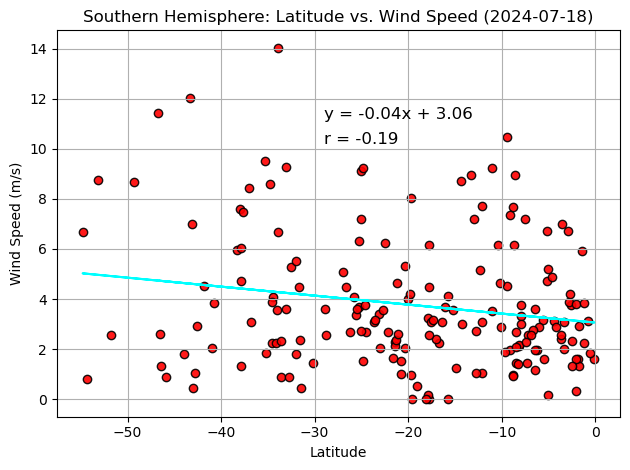

In [239]:
# Southern Hemisphere
slope, int, r, p, std_err = stats.linregress(southern_hemisphere_df["Lat"], southern_hemisphere_df["Wind Speed"])
fit = slope * southern_hemisphere_df["Lat"] + int
plt.scatter(southern_hemisphere_df["Lat"], southern_hemisphere_df["Wind Speed"], alpha=0.9, edgecolors="black", color="red")
plt.plot(southern_hemisphere_df["Lat"], fit, color="cyan")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"Southern Hemisphere: Latitude vs. Wind Speed (2024-07-18)")
plt.grid()
plt.tight_layout()
eq = "y = " + str(round(slope,2)) + "x + " + str(round(int,2))
plt.annotate(eq,(-29,11.2), fontsize=12)
reg = "r = " + str(round(r,2))
plt.annotate(reg,(-29,10.2), fontsize=12)

# Save the figure
plt.savefig("output_data/Fig12.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** I see no correlation for the wind speed values.